# 3.3 모델 구현하기

### 공통 처리

In [81]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family = 'D2Coding')
    plt.rc('font', size = 8)
# plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
# plt.rcParams['font.size'] = 12



# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
# plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

### 유방암 데이터 집합

UCI 데이터 집합 배포 웹사이트: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#### 분석 데이터 이미지
<img src="https://www.researchgate.net/profile/Nick_Street/publication/2512520/figure/fig2/AS:279373199495169@1443619169198/Snakes-After-Convergence-to-Cell-Nucleus-Boundaries-These-contours-are-the-nal.png" alt="Drawing" width="40%" align="left">


### 3.3.1 (1) 데이터 읽어 들이기

In [82]:
# 유방암 데이터 집합 읽어 들이기

# 라이브러리 임포트
from sklearn.datasets import load_breast_cancer

# 데이터 내려받기
cancer = load_breast_cancer()

# 데이터에 대한 설명 읽기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [83]:
# 데이터프레임으로 변환하기

columns = [
    '반지름_평균', '텍스처_평균', '둘레길이_평균', '면적_평균',
    '평활도_평균', '콤팩트도_평균', '오목면_평균',
    '오목점_평균', '대칭성_평균', '프랙탈도_평균',
    '반지름_표준편차', '텍스처_표준편차', '둘레길이_표준편차',
    '면적_표준편차', '평활도_표준편차',
    '콤팩트도_표준편차', '오목면_표준편차', '오목점_표준편차',
    '대칭성_표준편차', '프랙탈도_표준편차',
    '반지름_최대', '텍스처_최대', '둘레길이_최대', '면적_최대',
    '평활도_최대', '콤팩트도_최대', '오목면_최대', '오목점_최대',
    '대칭성_최대', '프랙탈도_최대'
]

# 읽어 들인 데이터를 데이터프레임으로 변환
# df = pd.DataFrame(cancer.data, columns=columns)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 정답 데이터를 꺼냄
y = pd.Series(cancer.target)

### 3.3.2 (2) 데이터 확인

In [84]:
# 입력 데이터를 화면에 출력하기

# 입력 데이터의 20번째 줄부터 24번째 줄까지 화면에 출력한다
display(df[20:25])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [85]:
# 정답 데이터를 화면에 출력하기

# 정답 데이터의 20번째 줄부터 24번째 줄까지 화면에 출력한다
print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int64


In [86]:
# 데이터에 대한 통계 정보 확인하기

# 입력 데이터의 행과 열의 수를 확인
print(df.shape)
print()

# 정답 데이터의 1과 0의 건수 확인
print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [87]:
# 산포도를 그리기 위한 준비
# 입력 데이터를 대응하는 정답 데이터의 값에 따라 분할한다

# 정답 데이터 = 0(악성)인 데이터 골라내기
df0 = df[y==0]

# 정답 데이터 = 1(양성)인 데이터 골라내기
df1 = df[y==1]

display(df0.head())
display(df1.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


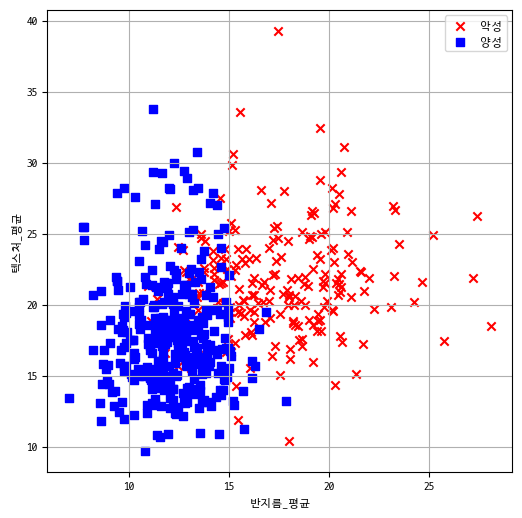

In [88]:


# 산포도 그리기

# 그래프의 크기를 설정
plt.figure(figsize=(6,6))

# 목적변수 값이 1인 데이터의 산포도 그리기
plt.scatter(df0['mean radius'], df0['mean texture'], marker='x',
    c='r', label='악성')

# 목적변수 값이 1인 데이터의 산포도 그리기
plt.scatter(df1['mean radius'], df1['mean texture'], marker='s',
    c='b', label='양성')

# 그리드 표시
plt.grid()

# 레이블 표시
plt.xlabel('반지름_평균')
plt.ylabel('텍스처_평균')

# 범례 그리기
plt.legend()

# 화면에 전체 그래프를 출력
plt.show()




### 3.3.3 (3) 데이터 전처리

In [89]:
# 입력 데이터를 두 개의 필드로 줄이기

input_columns = ['mean radius', 'mean texture']
x = df[input_columns]
display(x.head())

,mean radius,mean texture
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


### 3.3.4 (4) 데이터 분할

In [90]:
# 학습 데이터와 검증 데이터 분할하기

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [91]:
# 분할된 데이터를 확인하기(요소 수)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [92]:
# 분할된 데이터를 확인하기(요소 수)

display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,mean radius,mean texture
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,mean radius,mean texture
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

### 3.3.5 (5) 알고리즘 선택하기

In [93]:
# 알고리즘 선택

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

### 3.3.6 (6) 학습

In [94]:
# 학습

algorithm.fit(x_train, y_train)
#print(algorithm)
print(algorithm.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 3.3.7 (7) 예측

In [95]:
# 예측

# predict 함수를 호출한다
y_pred = algorithm.predict(x_test)

# 예측 결과를 확인
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


### 3.3.8 (8) 평가

In [96]:
# 정답 데이터와 예측 결과 비교하기

# 정답 데이터를 앞에서부터 10건 추려냄
# y_test는 데이터프레임이므로 value 속성에 담긴 넘파이 배열로 변환한다
y_test10 = y_test[:10].values
print(y_test10)

# 예측 결과를 앞에서부터 10건 추려냄
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [97]:
# 정답을 맞힌 건수 세기

# 정답 데이터 == 예측 결과　
w1 = (y_test10 == y_pred10)
print(w1)

# 정답을 맞힌 건수
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [98]:
# 정확도 계산하기

# 정답을 맞힌 건수를 계산
w = (y_test.values == y_pred)
correct = w.sum()

# 검증 데이터 전체 건수
N = len(w)

# 정확도 = (정답 수) / (검증 데이터 전체 건수)
score = correct / N

# 결과를 출력
print(f'정확도: {score:.04f}')

정확도: 0.8772


In [99]:
# score 함수를 사용

# score 함수를 사용해도 정확도를 계산할 수 있다
score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


### 3.3.9 (9) 튜닝

In [100]:
# 모델의 정확도 개선하기

# 원래 있던 30개 필드를 모두 포함해 학습 데이터와 검증 데이터를 다시 만든다
x2_train, x2_test, y_train, y_test = train_test_split(df, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

# 로지스틱 회귀 모델도 다시 만든다
algorithm2 = LogisticRegression(random_state=random_seed)

# 새로 만든 학습 데이터로 학습을 진행한다
algorithm2.fit(x2_train, y_train)

# 검증 데이터로 정확도를 확인한다
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9649


## (보충설명) 결정경계 그리기
이 아래의 셀은 결정경계를 그리기 위한 코드와, 해당 구현에 대한 설명을 담고 있다.

상당히 어려운 내용이므로, 파이썬에 익숙하지 않은 독자는 건너뛰어도 좋다.

파이썬 구현에 관심있는 독자라면 도움이 될 것이다.

### 로지스틱 회귀의 내부 구현

로지스틱 회귀 모델은 내부적으로 다음과 같이 동작한다.

(1) 입력변수를 1차 함수에 입력해 실수값을 구한다.

(2) (1)에서 얻은 1차 함수의 함숫값을 시그모이드 함수에 입력해 확률값을 계산한다.

(3) 예측결과는 (2)에서 얻은 확률값이 0.5보다 크면 1, 작으면 0이 된다.

(1)에서 사용된 1차 함수의 기울기와 절편을 변수 coef_, intercept_로 구할 수 있다.
다음 코드는 이러한 성질을 이용해 내부변수 값을 사용한다.

그리고 이 모델은 다중분류를 위해 변수의 내부 변수를 저장할 수 있도록 했다.
그러므로 2차원 배열이 사용됐지만, 여기서는 이진분류를 적용하므로
첫 번째 요소([0])만이 사용된다.

### 내부변수의 값에 접근하기

In [101]:
# 모델의 내부변수(절편, 계수)값 구하기

# x1, x2의 계수
w1 = algorithm.coef_[0][0]
w2 = algorithm.coef_[0][1]

# 절편
w0 = algorithm.intercept_[0]

# 값 확인하기
print(f'w0 = {w0:.4f}  w1 = {w1:.4f}  w2 = {w2:.4f}')

w0 = 19.6195  w1 = -1.0275  w2 = -0.2151


### boundary 함수의 정의

위에서 얻은 w0, w1, w2의 값을 사용해 산포도에 결정경계를 그리는 boundary 함수를 정의할 수 있다. 함수의 구현과 이를 유도한 식을 다음 셀에 싣는다.

In [102]:
# 결정경계를 계산하는 함수

# 결정경계 계산 함수
# 0 = w0 + w1 * x + w2 * y를 y에 대해 풀면
# y = -(w0 + w1 * x)/ w2가 된다

def boundary(algorithm, x):
    w1 = algorithm.coef_[0][0]
    w2 = algorithm.coef_[0][1]
    w0 = algorithm.intercept_[0]
    y = -(w0 + w1 * x)/w2
    return y

### 결정경계의 경곗값 계산하기

다음 코드는 위에서 정의한 boundary 함수를 사용해 결정경계를 구성하는 경곗값의 좌표를 구하는 코드다.
이와 함께, 데이터가 담긴 데이터프레임에서 최솟값과 최댓값을 구해
그래프를 더 보기 좋게 그린다.

In [103]:
# 결정경계의 경곗값 계산하기

# 결정경계의 x축 양끝 좌표값
x_range = np.array((df['mean radius'].min(), df['mean radius'].max()))

# 결정경계의 y축 양끝 좌표값
y_range = boundary(algorithm, x_range)

# y의 최솟값과 최댓값은 산포도의 점으로 결정한다
y_lim = (df['mean texture'].min(), df['mean texture'].max())

# 결과 확인
print('x축 양끝 좌표: ', x_range)
print('y축 양끝 좌표: ', y_range)
print('그래프의 y구간: ', y_lim)

x축 양끝 좌표:  [ 6.981 28.11 ]
y축 양끝 좌표:  [ 57.8637 -43.0655]
그래프의 y구간:  (9.71, 39.28)


### 산포도와 결정경계 그리기

모든 준비가 끝났다.
다음 코드는 코드 3-8에서 그린 산포도에 지금 계산한 결정경계를 겹쳐 그리는 코드다.

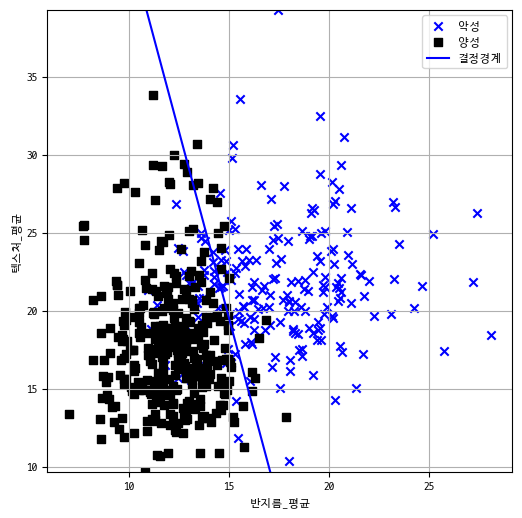

In [105]:
# 산포도와 결정경계 그리기

# 그래프 크기 정의
plt.figure(figsize=(6,6))

# 목적변수의 값이 0인 데이터의 산포도
plt.scatter(df0['mean radius'], df0['mean texture'], marker='x', c='b', label='악성')

# 목적변수의 값이 1인 데이터의 산포도
plt.scatter(df1['mean radius'], df1['mean texture'], marker='s', c='k', label='양성')

# 결정경계
plt.plot(x_range, y_range, c='b', label='결정경계')

# 범위 지정
plt.ylim(y_lim)

# 레이블 추가
plt.xlabel('반지름_평균')
plt.ylabel('텍스처_평균')

# 범례 표시
plt.legend()

# 그리드 표시
plt.grid()

# 그래프 화면 출력
plt.show()